In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-11-24 06:48:04.876619: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-11-24 06:48:23.832470: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-24 06:48:23.922904: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-24 06:48:23.923344: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-24 06:48:23.923389: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [7]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 200


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)

reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

# Custom CNN model

Training with Data Augmentation

In [8]:
'''
model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)
'''

'\nmodel_A = get_model_A(0.0, True, 0.0)\nhistory = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)\nshow_plot(history, 0.0)\ntest_accuracy(model_A, test_dataset)\nprint_tsne(model_A, test_dataset, 2500)\n'

In [9]:
'''
model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)
'''

'\nmodel_B = get_model_B(0.0, True, 0.0)\nhistory = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)\nshow_plot(history, 0.0)\ntest_accuracy(model_B, test_dataset)\nprint_tsne(model_B, test_dataset, 2500)\n'

# MobileNetV2 Model From Scratch

Training model, epochs:  200
Epoch 1/200


2022-11-24 06:48:31.954301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-24 06:48:31.988305: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100020000 Hz
2022-11-24 06:48:32.597139: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-11-24 06:48:33.072796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302


   3/1200 [..............................] - ETA: 34s - loss: 0.7147 - accuracy: 0.5938    

2022-11-24 06:48:33.616440: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-11-24 06:48:33.617442: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1200/1200 [==============================] - 53s 41ms/step - loss: 0.3411 - accuracy: 0.8377 - val_loss: 0.2608 - val_accuracy: 0.8857


2022-11-24 06:49:31.780522: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 2/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2425 - accuracy: 0.8944 - val_loss: 0.2377 - val_accuracy: 0.8970


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 3/200
1200/1200 [==============================] - 44s 36ms/step - loss: 0.2231 - accuracy: 0.9064 - val_loss: 0.2283 - val_accuracy: 0.9035


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 4/200
1200/1200 [==============================] - 42s 35ms/step - loss: 0.2135 - accuracy: 0.9111 - val_loss: 0.2232 - val_accuracy: 0.9051


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 5/200
1200/1200 [==============================] - 39s 33ms/step - loss: 0.2098 - accuracy: 0.9122 - val_loss: 0.2188 - val_accuracy: 0.9094


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 6/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.2050 - accuracy: 0.9149 - val_loss: 0.2170 - val_accuracy: 0.9081


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 7/200
1200/1200 [==============================] - 45s 38ms/step - loss: 0.2006 - accuracy: 0.9168 - val_loss: 0.2133 - val_accuracy: 0.9105


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 8/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1991 - accuracy: 0.9169 - val_loss: 0.2122 - val_accuracy: 0.9105


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 9/200
1200/1200 [==============================] - 44s 37ms/step - loss: 0.1981 - accuracy: 0.9184 - val_loss: 0.2101 - val_accuracy: 0.9119


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 10/200
1200/1200 [==============================] - 44s 36ms/step - loss: 0.1963 - accuracy: 0.9190 - val_loss: 0.2080 - val_accuracy: 0.9124


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 11/200
1200/1200 [==============================] - 42s 35ms/step - loss: 0.1938 - accuracy: 0.9212 - val_loss: 0.2071 - val_accuracy: 0.9127


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 12/200
1200/1200 [==============================] - 52s 43ms/step - loss: 0.1942 - accuracy: 0.9196 - val_loss: 0.2062 - val_accuracy: 0.9136


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 13/200
1200/1200 [==============================] - 49s 40ms/step - loss: 0.1915 - accuracy: 0.9208 - val_loss: 0.2052 - val_accuracy: 0.9133


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 14/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.1907 - accuracy: 0.9223 - val_loss: 0.2040 - val_accuracy: 0.9145


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 15/200
1200/1200 [==============================] - 48s 40ms/step - loss: 0.1889 - accuracy: 0.9218 - val_loss: 0.2038 - val_accuracy: 0.9145


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 16/200
1200/1200 [==============================] - 50s 42ms/step - loss: 0.1885 - accuracy: 0.9233 - val_loss: 0.2030 - val_accuracy: 0.9141


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 17/200
1200/1200 [==============================] - 47s 39ms/step - loss: 0.1893 - accuracy: 0.9225 - val_loss: 0.2016 - val_accuracy: 0.9160


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 18/200
1200/1200 [==============================] - 43s 36ms/step - loss: 0.1876 - accuracy: 0.9219 - val_loss: 0.2011 - val_accuracy: 0.9162


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 19/200
1200/1200 [==============================] - 44s 37ms/step - loss: 0.1869 - accuracy: 0.9224 - val_loss: 0.2020 - val_accuracy: 0.9133
Epoch 20/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1852 - accuracy: 0.9244 - val_loss: 0.2008 - val_accuracy: 0.9139


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 21/200
1200/1200 [==============================] - 38s 31ms/step - loss: 0.1845 - accuracy: 0.9234 - val_loss: 0.1998 - val_accuracy: 0.9154


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 22/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1828 - accuracy: 0.9244 - val_loss: 0.1993 - val_accuracy: 0.9159


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 23/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1843 - accuracy: 0.9245 - val_loss: 0.1992 - val_accuracy: 0.9165


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 24/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1850 - accuracy: 0.9249 - val_loss: 0.1988 - val_accuracy: 0.9159


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 25/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1828 - accuracy: 0.9258 - val_loss: 0.1985 - val_accuracy: 0.9166


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 26/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1824 - accuracy: 0.9243 - val_loss: 0.1980 - val_accuracy: 0.9170


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 27/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1824 - accuracy: 0.9251 - val_loss: 0.1983 - val_accuracy: 0.9162
Epoch 28/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1831 - accuracy: 0.9255 - val_loss: 0.1976 - val_accuracy: 0.9176


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 29/200
1200/1200 [==============================] - 38s 31ms/step - loss: 0.1837 - accuracy: 0.9246 - val_loss: 0.1977 - val_accuracy: 0.9175
Epoch 30/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1811 - accuracy: 0.9275 - val_loss: 0.1978 - val_accuracy: 0.9166
Epoch 31/200
1200/1200 [==============================] - 39s 33ms/step - loss: 0.1845 - accuracy: 0.9249 - val_loss: 0.1976 - val_accuracy: 0.9166
Epoch 32/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1823 - accuracy: 0.9267 - val_loss: 0.1975 - val_accuracy: 0.9167


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 33/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1803 - accuracy: 0.9260 - val_loss: 0.1974 - val_accuracy: 0.9170


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 34/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.1829 - accuracy: 0.9245 - val_loss: 0.1973 - val_accuracy: 0.9177


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 35/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1788 - accuracy: 0.9276 - val_loss: 0.1972 - val_accuracy: 0.9195


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 36/200
1200/1200 [==============================] - 37s 30ms/step - loss: 0.1817 - accuracy: 0.9259 - val_loss: 0.1967 - val_accuracy: 0.9183


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 37/200
1200/1200 [==============================] - 40s 34ms/step - loss: 0.1811 - accuracy: 0.9266 - val_loss: 0.1967 - val_accuracy: 0.9178
Epoch 38/200
1200/1200 [==============================] - 42s 35ms/step - loss: 0.1794 - accuracy: 0.9264 - val_loss: 0.1966 - val_accuracy: 0.9192


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 39/200
1200/1200 [==============================] - 40s 34ms/step - loss: 0.1786 - accuracy: 0.9273 - val_loss: 0.1967 - val_accuracy: 0.9192
Epoch 40/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.1802 - accuracy: 0.9283 - val_loss: 0.1961 - val_accuracy: 0.9175


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 41/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1786 - accuracy: 0.9275 - val_loss: 0.1954 - val_accuracy: 0.9186


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 42/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1800 - accuracy: 0.9265 - val_loss: 0.1955 - val_accuracy: 0.9194
Epoch 43/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1791 - accuracy: 0.9275 - val_loss: 0.1952 - val_accuracy: 0.9204


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 44/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1802 - accuracy: 0.9264 - val_loss: 0.1949 - val_accuracy: 0.9193


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 45/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1779 - accuracy: 0.9267 - val_loss: 0.1951 - val_accuracy: 0.9200
Epoch 46/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1776 - accuracy: 0.9274 - val_loss: 0.1954 - val_accuracy: 0.9187
Epoch 47/200
1200/1200 [==============================] - 37s 30ms/step - loss: 0.1764 - accuracy: 0.9278 - val_loss: 0.1951 - val_accuracy: 0.9210
Epoch 48/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.1784 - accuracy: 0.9281 - val_loss: 0.1956 - val_accuracy: 0.9200
Epoch 49/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.1776 - accuracy: 0.9269 - val_loss: 0.1949 - val_accuracy: 0.9209


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets

Epoch 00049: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 50/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1768 - accuracy: 0.9265 - val_loss: 0.1949 - val_accuracy: 0.9215
Epoch 51/200
1200/1200 [==============================] - 37s 30ms/step - loss: 0.1782 - accuracy: 0.9273 - val_loss: 0.1948 - val_accuracy: 0.9207


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 52/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1767 - accuracy: 0.9275 - val_loss: 0.1950 - val_accuracy: 0.9212
Epoch 53/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1762 - accuracy: 0.9290 - val_loss: 0.1948 - val_accuracy: 0.9206
Epoch 54/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1770 - accuracy: 0.9278 - val_loss: 0.1948 - val_accuracy: 0.9207


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 55/200
1200/1200 [==============================] - 38s 31ms/step - loss: 0.1765 - accuracy: 0.9283 - val_loss: 0.1949 - val_accuracy: 0.9207
Epoch 56/200
1200/1200 [==============================] - 38s 31ms/step - loss: 0.1793 - accuracy: 0.9274 - val_loss: 0.1949 - val_accuracy: 0.9205

Epoch 00056: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 57/200
1200/1200 [==============================] - 37s 30ms/step - loss: 0.1780 - accuracy: 0.9275 - val_loss: 0.1949 - val_accuracy: 0.9206
Epoch 58/200
1200/1200 [==============================] - 38s 32ms/step - loss: 0.1765 - accuracy: 0.9280 - val_loss: 0.1949 - val_accuracy: 0.9206
Epoch 59/200
1200/1200 [==============================] - 42s 35ms/step - loss: 0.1794 - accuracy: 0.9268 - val_loss: 0.1949 - val_accuracy: 0.9205
Epoch 60/200
1200/1200 [==============================] - 44s 37ms/step - loss: 0.1767 - accuracy: 0.9281 - val_loss:

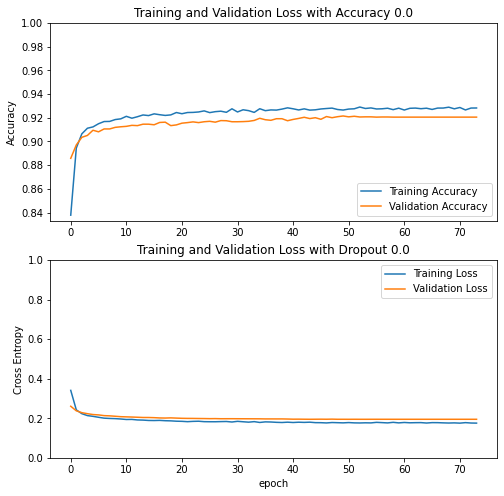

258/258 [==============================] - 10s 38ms/step - loss: 0.1890 - accuracy: 0.9188
Test accuracy : 0.9188039302825928


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.013s...
[t-SNE] Computed neighbors for 8227 samples in 2.615s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 5.987254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.962189
[t-SNE] KL divergence after 2500 iterations: 2.126338


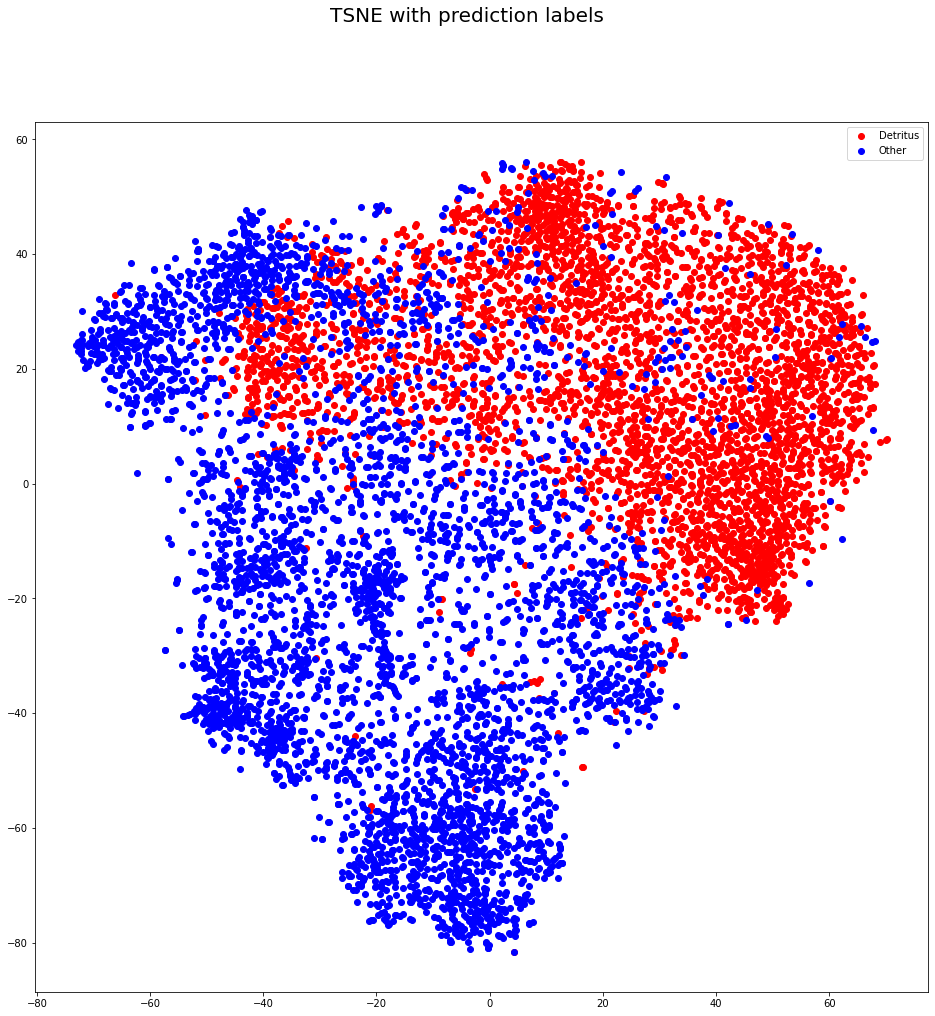

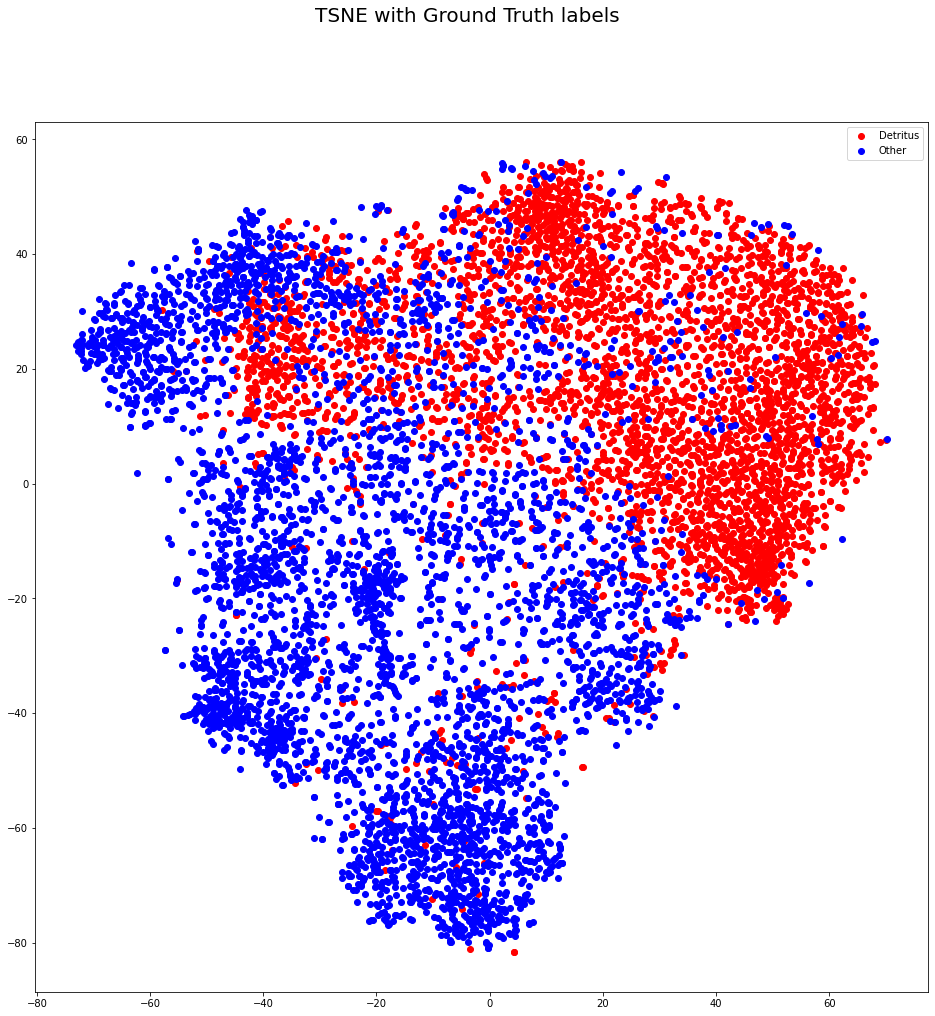

In [10]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

base_learning_rate = 0.0001
baseMobile, mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

In [11]:
show_report(mobileNetModelSc, test_data_generator)

NameError: name 'densenet_model' is not defined

In [12]:
correct, incorrect, correct_files, incorrect_files = show_confusion_matrix(mobileNetModelSc, test_data_generator)

Detritus 17 3787 3804 0.004468980021030494
Other 4364 59 4423 0.9866606375763056


In [13]:
incorrect_files

['../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_00_19_43.344_1250_603.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_06_19_05.639_1833_155.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-21_11_27_13.664_1454_1731_-_Cópia.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_109_2017-09-19_09_08_21.071_1956_1686.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_115_2017-09-21_23_41_42.650_137_1888.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_124_2017-09-20_20_25_49.768_653_1763.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_126_2017-09-19_05_57_56.992_0_1650.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_13_2017-09-22_06_00_04.648_984_1733.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_162_2017-09-21_02_55_19.170_1421_1298.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/f

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output-MobileNet-Scratch/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [ ]:
# process_results(correct_files, incorrect_files, "test")

# DenseNet model

In [14]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=(160, 160, 3))
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    show_plot(acc, val_acc, loss, val_loss)

    print_tsne(dense_model, test_dataset)

In [15]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [16]:
# do_transfer_learning(0.0, False, 0.0)

In [ ]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0, denseNetModel, base_dense_model)

Epoch 1/200
1200/1200 [==============================] - 107s 81ms/step - loss: 0.3389 - accuracy: 0.8506 - val_loss: 0.2426 - val_accuracy: 0.9024
INFO:tensorflow:Assets written to: .dense_net_ft/assets
Epoch 2/200
1200/1200 [==============================] - 92s 77ms/step - loss: 0.2370 - accuracy: 0.9001 - val_loss: 0.2166 - val_accuracy: 0.9164
INFO:tensorflow:Assets written to: .dense_net_ft/assets
Epoch 3/200
1200/1200 [==============================] - 94s 78ms/step - loss: 0.2195 - accuracy: 0.9094 - val_loss: 0.2057 - val_accuracy: 0.9176
INFO:tensorflow:Assets written to: .dense_net_ft/assets
Epoch 4/200
1200/1200 [==============================] - 93s 77ms/step - loss: 0.2087 - accuracy: 0.9136 - val_loss: 0.2014 - val_accuracy: 0.9216
INFO:tensorflow:Assets written to: .dense_net_ft/assets
Epoch 5/200
1200/1200 [==============================] - 93s 78ms/step - loss: 0.2028 - accuracy: 0.9168 - val_loss: 0.1976 - val_accuracy: 0.9233
INFO:tensorflow:Assets written to: .dens

1200/1200 [==============================] - 93s 77ms/step - loss: 0.1762 - accuracy: 0.9289 - val_loss: 0.1748 - val_accuracy: 0.9306
Epoch 43/200
1200/1200 [==============================] - 93s 77ms/step - loss: 0.1737 - accuracy: 0.9305 - val_loss: 0.1753 - val_accuracy: 0.9318
Epoch 44/200
1200/1200 [==============================] - 93s 77ms/step - loss: 0.1748 - accuracy: 0.9292 - val_loss: 0.1746 - val_accuracy: 0.9306
INFO:tensorflow:Assets written to: .dense_net_ft/assets
Epoch 45/200
1200/1200 [==============================] - 94s 78ms/step - loss: 0.1738 - accuracy: 0.9289 - val_loss: 0.1747 - val_accuracy: 0.9306
Epoch 46/200
1200/1200 [==============================] - 93s 77ms/step - loss: 0.1741 - accuracy: 0.9295 - val_loss: 0.1752 - val_accuracy: 0.9317
Epoch 47/200
1200/1200 [==============================] - 94s 79ms/step - loss: 0.1740 - accuracy: 0.9297 - val_loss: 0.1748 - val_accuracy: 0.9319
Epoch 48/200
1200/1200 [==============================] - 94s 78ms/st

In [ ]:
show_report(denseNetModel, test_data_generator)

In [ ]:
correct, incorrect, dense_correct_files, dense_incorrect_files = show_confusion_matrix(denseNetModel, test_data_generator)

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [ ]:
# process_results(dense_correct_files, dense_incorrect_files, "test")

In [ ]:
len(dense_incorrect_files)

In [ ]:
len(incorrect_files)

In [ ]:
len(list(set(incorrect_files) - set(dense_incorrect_files)))

In [ ]:
len(list(set(dense_incorrect_files) - set(incorrect_files)))

In [ ]:
len(list(set(dense_incorrect_files) & set(incorrect_files)))